In [147]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [109]:
data = pd.read_csv("fraud.csv")

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [110]:
df = data.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [8]:
df.isnull().values.any()

False

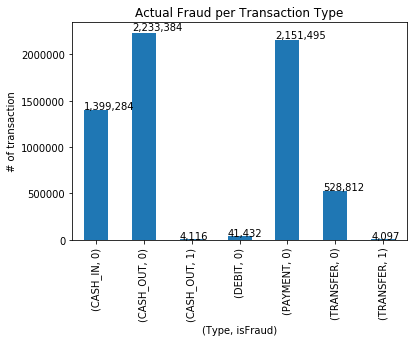

In [15]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("Actual Fraud per Transaction Type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("# of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

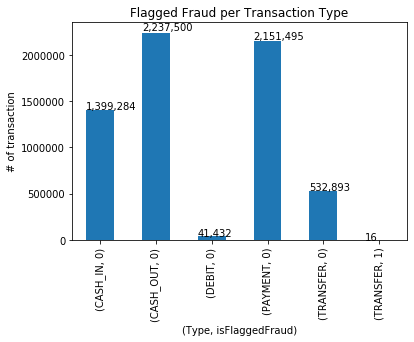

In [16]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("Flagged Fraud per Transaction Type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("# of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [ ]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)
df = df.reset_index(drop=True)

In [132]:
df_new.head(1)

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,type
2,1,181.0,181.0,0.0,0.0,0.0,1,TRANSFER


In [112]:
df_new = df[(df["type"] == "CASH_OUT") | (df["type"] == "TRANSFER")]

In [114]:
df_new["type"]=df_new["type"].astype('category')

In [122]:
df_new = df_new[["step", "amount","oldBalanceOrig","newBalanceOrig","oldBalanceDest","newBalanceDest","isFraud","type"]]

In [68]:
import pandas as pd
dummies = pd.get_dummies(df['type'])

In [115]:
df_pca=pd.get_dummies(df_new, columns=["type"])

In [127]:
df_pca.head(1)

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,type_CASH_OUT,type_TRANSFER,isFraud
2,1,181.0,181.0,0.0,0.0,0.0,0,1,1


In [133]:
df_pca = df_pca[["step", "amount","oldBalanceOrig","newBalanceOrig","oldBalanceDest","newBalanceDest","type_CASH_OUT","type_TRANSFER","isFraud"]]

In [56]:
df_new.drop(['type'], axis=1, inplace=True)
df_pca = df_new.reset_index(drop=True)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


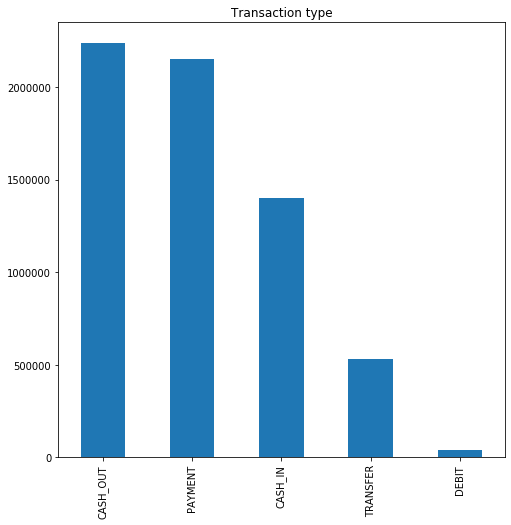

In [10]:
print(df.type.value_counts())
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

In [134]:
df_pca.head(1)

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,type_CASH_OUT,type_TRANSFER,isFraud
2,1,181.0,181.0,0.0,0.0,0.0,0,1,1


In [143]:
from sklearn.model_selection import train_test_split
X,y=df_pca.iloc[:,7].values, df_pca.iloc[:,8].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [136]:
scov=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[1.77580217 1.31333435 0.9910982  0.22686885 0.69289902]


In [150]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
lr=LogisticRegression()
lpca = PCA(n_components=2)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
y_train_pre=lr.predict(X_train_pca)
y_test_pre=lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre))
print(metrics.accuracy_score(y_test, y_test_pre))

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [138]:
print(lpca.components_)

[[ 0.00163807  0.13148797  0.70526484  0.69629158  0.02208568]
 [ 0.16750346  0.68486514 -0.04311675 -0.10823992  0.6995194 ]]


AttributeError: 'StandardScaler' object has no attribute 'corr'